# Basic Usage

This notebook serves as an introduction to the core functionality of ```chessmate```. In this section, the basic functionality will be introduced.

In [1]:
# Since chessmate is a wrapper around python-chess, importing chess 
# at the beginning is a good idea
import chess

## Setting up a simulation between engines

In [2]:
from chessmate.simulations import ChessPlayground
from chessmate.engines import CaptureHighestValue, Random

A simulation can be setup between any two engines. The most simple use case would be where two base engine implementations are played against each other 

In [3]:
simple_simulation = ChessPlayground(CaptureHighestValue(), Random())
simple_simulation.play_multiple_games(100)

Playing game 100: 100%|██████████| 100/100 [00:11<00:00,  8.80it/s]


To setup a simulation between engines with tuned parameters, initialize the engines with the parameters tuned

In [4]:
from chessmate.engines import MiniMax
from chessmate.analysis import PiecePositionEvaluation

# Init CaptureHighestValue w/ PiecePositionEvaluation
capture_highest_value_tuned = CaptureHighestValue()
capture_highest_value_tuned.evaluation_function = PiecePositionEvaluation()

# Init MiniMax w/ alpha beta pruning and no move ordering
minimax_tuned = MiniMax(color=chess.BLACK, depth=2)
minimax_tuned.alpha_beta_pruning = True
minimax_tuned.move_ordering = False

In [5]:
tuned_simulation = ChessPlayground(capture_highest_value_tuned, minimax_tuned)
tuned_simulation.play_multiple_games(5)

Playing game 5: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]


To view examples of more available engines, view ```chessmate.engines```

## Analyzing an engine's performance

In [6]:
from chessmate.utils import (display_all_results,
                             display_material_difference,
                             walkthrough_pgn)

View all game results of a simulation

Counter({'Stalemate': 4, 'Black win by mate': 1})

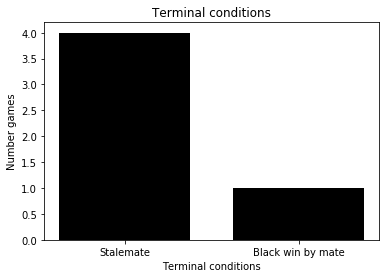

In [7]:
display_all_results(tuned_simulation.all_results)

Plot material difference of game

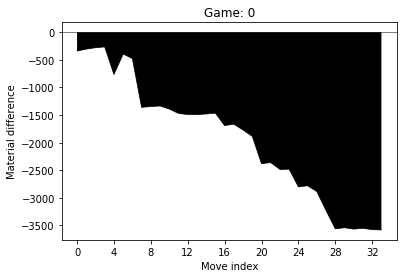

In [8]:
game_index_in_simulation = 0
display_material_difference(
    tuned_simulation.all_material_differences, game_index_in_simulation)

Walkthrough a game

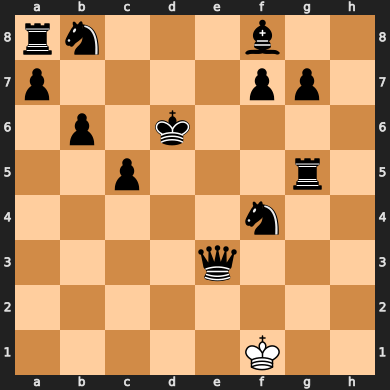

Move 68_White to move


In [9]:
walkthrough_pgn(tuned_simulation.game_pgns[0], delay=0.25)

You can also get numeric evaluations by accessing the evaluation function of engines to study how engines are valuing board states

In [10]:
# View all evaluations of MiniMax engine. To access specific value, use board FEN as key
minimax_tuned.evaluation_function.evaluations

{'rnbqkbnr/pppp1ppp/8/4p3/3P4/5P2/PPP1P1PP/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/5N2/PPP1PPPP/RNBQKB1R b KQkq - 1 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/2P5/PP2PPPP/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/3Q4/PPP1PPPP/RNB1KBNR b KQkq - 1 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/2PP4/8/PP2PPPP/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/N7/PPP1PPPP/R1BQKBNR b KQkq - 1 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/7N/PPP1PPPP/RNBQKB1R b KQkq - 1 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/7P/PPP1PPP1/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/6P1/PPP1PP1P/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/1P1P4/8/P1P1PPPP/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/2N5/PPP1PPPP/R1BQKBNR b KQkq - 1 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P4/1P6/P1P1PPPP/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/7B/4p3/3P4/8/PPP1PPPP/RN1QKBNR b KQkq - 1 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P3P/8/PPP1PPP1/RNBQKBNR b KQkq - 0 2': 0,
 'rnbqkbnr/pppp1ppp/8/4p3/3P

To view more examples of available analysis, view ```chessmate.utils```

## Playing against an engine

Enter the UCI notation of the move in the input field to select a move i.e ```e2e4```. Enter ```res``` to terminate the game

res


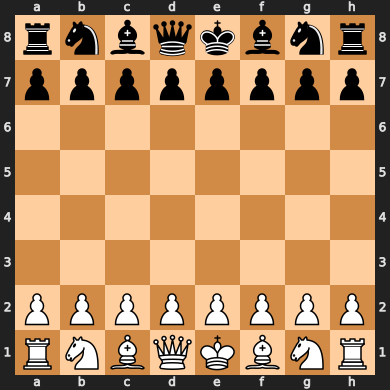

Game over by resignation!


In [11]:
from chessmate.simulations import PlayVsEngine
playvs = PlayVsEngine(CaptureHighestValue())
playvs.play_game()

# Advanced usage

This section will serve as guide towards the various customizations and knobs available on ```chessmate```. chessmate is written such that nearly every aspect of the engines are controllable to some extent.

For starters, the basic levers one has control over are:
1. <b>Engines</b>. An engine is any object that evaluates a board state and returns a move. To define an engine, inherit from ```chessmate.engines.BaseEngine```. The chessmate framework is built around the engine, so this is the largest knob to turn.
2. <b>Evaluation functions</b>. An evaluation function indicates to the engine the metrics or strategy on how to value a board state. Some examples of evaluation functions are the ```StandardEvaluation``` and ```PiecePositionEvaluation``` functions seen in ```chessmate.analysis```. To define an evaluation function, inherit from ```chessmate.analysis.EvaluationFunction```.
3. <b>Move ordering heuristics</b>. A heuristic indicates to the engine how move ordering should be evaluated i.e "moves that feature captures should be evaluated first". Only engines that have move_ordering implemented will be able to take advantage of this. Unlike 1 and 2, a heuristic is simply a function that takes in a boardstate and returns an ordered list of moves. See ```chessmate.heuristics``` for more examples.
4. <b>Piece values and piece value tables</b>. These indicate the absolute value of each piece and the relative value of each square respectively. A piece value is an enum and a piece table is a list of numpy arrays. See ```chessmate.constants.piece_values``` for more examples.